In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\iryna\Documents\01.07.2024 Instacart Basket Analysis'

In [3]:
custs_ords_prods_merged = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_merged.pkl'))

### Consider any security implications that might exist and address any PII data in the data before continuing analysis.

In [5]:
custs_ords_prods_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [6]:
# In accordance with data protection, the first and last name must be deleted.

custs_ords_prods_merged = custs_ords_prods_merged.drop(columns = ['first_name','surname'])

In [7]:
custs_ords_prods_merged.columns 

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', '_merge'],
      dtype='object')

### Comparing customer behavior in different geographic areas. Creating a regional segmentation of the data (a “Region” column based on the “State” column from customers data set)

In [9]:
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [10]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinos', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# Creating 'Region' columns based on the “State” column

In [14]:
custs_ords_prods_merged.loc[custs_ords_prods_merged ['state'].isin(northeast_region), 'region'] = 'Northeast'

In [15]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['state'].isin(midwest_region), 'region'] = 'Midwest'

In [16]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['state'].isin(south_region), 'region'] = 'South'

In [17]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['state'].isin(west_region), 'region'] = 'West'

In [18]:
len(custs_ords_prods_merged['region'])

32404859

In [19]:
custs_ords_prods_merged['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       6964301
Northeast     5722736
NaN            633024
Name: count, dtype: int64

#### A difference in spending habits between the different U.S. regions. (do this by crossing the variable you just created with the spending flag).

In [21]:
# Create a crosstab between 'region' and 'spending_flag'
reg_spend_crosstab = pd.crosstab(custs_ords_prods_merged['region'], custs_ords_prods_merged['spending_flag'], dropna = False)

In [22]:
reg_spend_crosstab.to_clipboard()

In [23]:
reg_spend_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,145705,6818596
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559
NaN,10270,622754


##### We can observe a difference in spending habits by region. Northeast has the lowest spending habits. The largest and almost 2 times exceeding the Northeast is the South region.

### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [26]:
# Excluding customers with max_order less than 5 

custs_ords_prods_merged.loc[custs_ords_prods_merged['max_order'] < 5, 'exclusion_flag'] = 'Exclude'
custs_ords_prods_merged.loc[custs_ords_prods_merged['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [27]:
custs_ords_prods_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Exclude
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Exclude


In [28]:
custs_ords_prods_merged['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [29]:
exclusion_flag_crosstab = pd.crosstab(custs_ords_prods_merged['exclusion_flag'], custs_ords_prods_merged['max_order'], dropna = False)

In [30]:
exclusion_flag_crosstab

max_order,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
exclusion_flag,,,,,,,,,,,,,,,,,,,,,
Exclude,5,6,686741,753543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Keep,0,0,0,0,793140,811396,803979,811843,810213,773124,...,48328,59378,55127,50333,52600,59877,40453,44949,44587,1171333


In [31]:
exclusion_flag_crosstab.to_clipboard()

In [32]:
# Creating sample with 'Keep' rows 

Active_cust_sample = custs_ords_prods_merged[custs_ords_prods_merged['exclusion_flag'] == 'Keep']

In [33]:
Active_cust_sample.shape

(30964564, 32)

In [34]:
# Exporting sample

Active_cust_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_cust_sample.pkl'))

### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [36]:
# Creating age profiling variable
# Young adult =< 25,  Adult 25-44, Older Adult 45-64, Elder 65+

In [37]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['age']<=25, 'age_group']= 'Young adult'

In [38]:
custs_ords_prods_merged.loc[(custs_ords_prods_merged['age'] >25) & (custs_ords_prods_merged['age'] <45), 'age_group']= 'Adult'

In [39]:
custs_ords_prods_merged.loc[(custs_ords_prods_merged['age']>=45) & (custs_ords_prods_merged['age']<= 64), 'age_group']= 'Older Adult'


In [40]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['age'] >=65, 'age_group']= 'Elder'

In [41]:
custs_ords_prods_merged['age_group'].value_counts(dropna = False)

age_group
Older Adult    10139691
Adult           9644895
Elder           8575084
Young adult     4045189
Name: count, dtype: int64

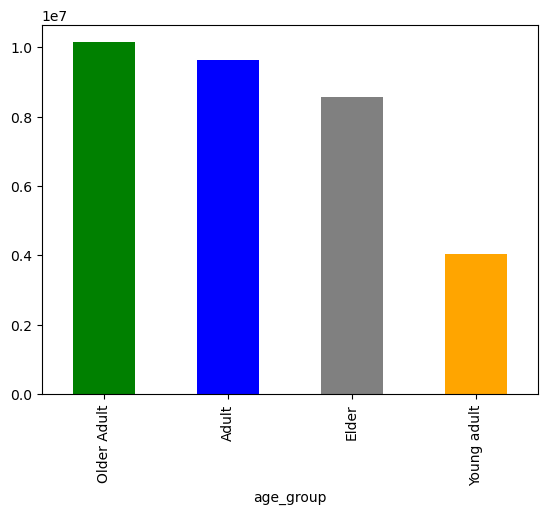

In [42]:
# Age profile visualization

bar = custs_ords_prods_merged['age_group'].value_counts().plot.bar(color =['green', 'blue', 'grey','orange'])

In [43]:
bar.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'bar_agegroup_4.10.png'))

In [44]:
# Creating income profiling variable (income categories: low, middle, & high income groups)

In [45]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['income'] <= 50000, 'income_group'] = 'Low'

In [46]:
custs_ords_prods_merged.loc[(custs_ords_prods_merged['income'] > 50000) & (custs_ords_prods_merged['income'] <= 100000), 'income_group'] = 'Middle'


In [47]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['income'] > 100000, 'income_group'] = 'High'

In [48]:
# Checking frequency of income_group 

custs_ords_prods_merged['income_group'].value_counts(dropna = False) 

income_group
High      14814202
Middle    13996574
Low        3594083
Name: count, dtype: int64

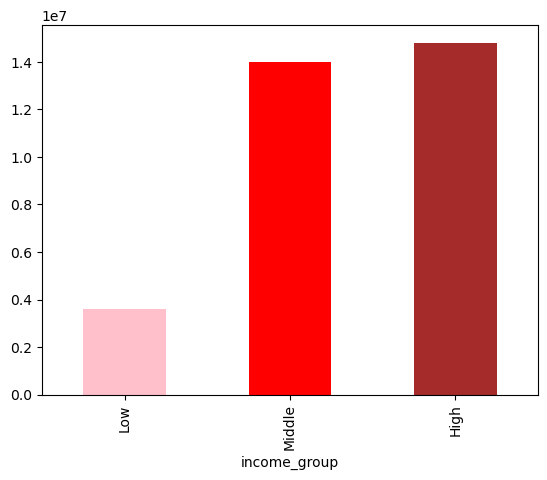

In [49]:
# Income profile visualization

bar2 = custs_ords_prods_merged['income_group'].value_counts().sort_values().plot.bar(color =['pink', 'red', 'brown'])

In [50]:
# Importing chart

bar2.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'bar_income_group_4.10.png'))

In [51]:
# Creating number of dependents profiling variable (customers with dependents - 'Has dependents' and customers without dependents 'No dependents')

In [52]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['number_of_dependents'] > 0, 'dependents_flag'] = 'Has dependents'

In [53]:
custs_ords_prods_merged.loc[custs_ords_prods_merged['number_of_dependents'] == 0, 'dependents_flag'] = 'No dependents'

In [54]:
custs_ords_prods_merged['dependents_flag'].value_counts(dropna = False)

dependents_flag
Has dependents    24307356
No dependents      8097503
Name: count, dtype: int64

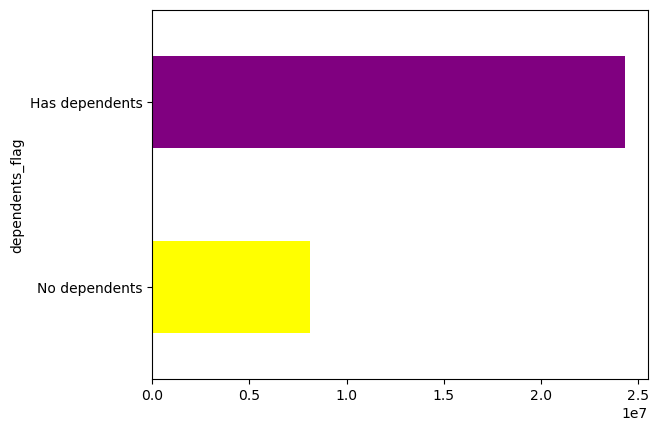

In [55]:
# Number of dependents profile visualization

bar3 = custs_ords_prods_merged['dependents_flag'].value_counts().sort_values().plot.barh(color =['yellow', 'purple'])

In [137]:
# Importing chart

bar3.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'bar_dependents_flag_4.10.png'))

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [57]:
# Aggregate for age group order frequency
custs_ords_prods_merged.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                    10.850664  0.0  30.0
Elder                    10.816974  0.0  30.0
Older Adult              10.856949  0.0  30.0
Young adult              10.830048  0.0  30.0

In [58]:
# Aggregate for age group expenditure
custs_ords_prods_merged.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        11.849466  1.0  99999.0
Elder        11.768850  1.0  99999.0
Older Adult  12.205612  1.0  99999.0
Young adult  12.175118  1.0  99999.0

In [59]:
# Aggregate for income group order frequency
custs_ords_prods_merged.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
income_group                                  
High                      10.786132  0.0  30.0
Low                       11.252457  0.0  30.0
Middle                    10.793746  0.0  30.0

In [60]:
# Aggregate for income group expenditure
custs_ords_prods_merged.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
income_group                         
High          16.579815  1.0  99999.0
Low            6.696985  1.0     25.0
Middle         8.468592  1.0  99999.0

In [61]:
 # Aggregate for dependent group order frequency
custs_ords_prods_merged.groupby('dependents_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependents_flag                                  
Has dependents               10.848293  0.0  30.0
No dependents                10.819676  0.0  30.0

In [62]:
# Aggregate for dependent group expenditure
custs_ords_prods_merged.groupby('dependents_flag').agg({'prices': ['mean', 'min', 'max']})  

prices              
                      mean  min      max
dependents_flag                         
Has dependents   11.930584  1.0  99999.0
No dependents    12.129243  1.0  99999.0

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [64]:
# Creating crosstab to compare age group profile with region locations
age_region_comparison = pd.crosstab(custs_ords_prods_merged['age_group'],custs_ords_prods_merged['region'],dropna=False)

In [65]:
age_region_comparison

region,Midwest,Northeast,South,West,NaN
age_group,,,,,
Adult,2087718,1678856,3236871,2454402,187048
Elder,1830985,1553903,2836257,2194080,159859
Older Adult,2182842,1778865,3342092,2626553,209339
Young adult,862756,711112,1376665,1017878,76778


<Figure size 1000x700 with 0 Axes>

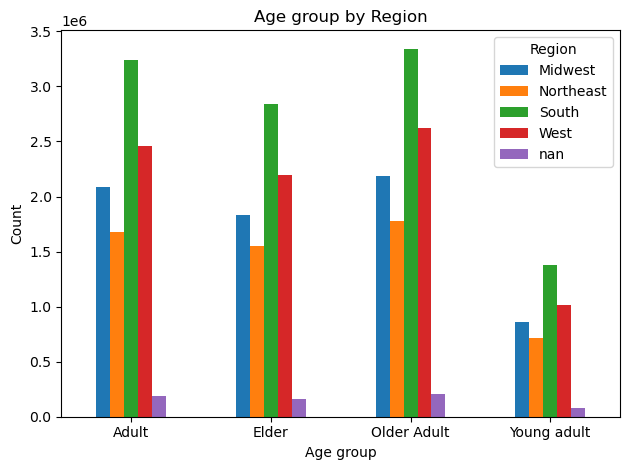

In [66]:
# Creating Bar chart for Age group by Region 
plt.figure(figsize=(10, 7))
age_region_comparison_bar= age_region_comparison.plot(kind='bar',rot=0)
plt.title('Age group by Region')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [1]:
# Importing chart

age_region_comparison_bar.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'age_region_comparison_bar_4.10.png'))

NameError: name 'age_region_comparison_bar' is not defined

In [67]:
# Creating crosstab to compare income group profile with region locations
income_region_comparison = pd.crosstab(custs_ords_prods_merged['income_group'],custs_ords_prods_merged['region'],dropna=False)

In [68]:
income_region_comparison

region,Midwest,Northeast,South,West,NaN
income_group,,,,,
High,3254082,2628413,4865368,3780506,285833
Low,767313,627256,1219460,908969,71085
Middle,2942906,2467067,4707057,3603438,276106


<Figure size 1000x700 with 0 Axes>

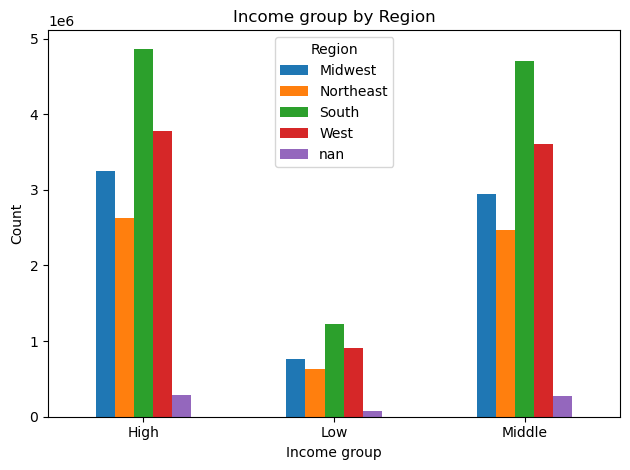

In [69]:
# Creating Bar chart for Income group by Region 
plt.figure(figsize=(10, 7))
income_region_comparison_bar= income_region_comparison.plot(kind='bar',rot=0)
plt.title('Income group by Region')
plt.xlabel('Income group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [141]:
# Importing chart

income_region_comparison_bar.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'income_region_comparison_bar_4.10.png'))

In [70]:
# Creating crosstab to compare dependent group profile with region locations
dependent_region_comparison = pd.crosstab(custs_ords_prods_merged['dependents_flag'],custs_ords_prods_merged['region'],dropna=False)

In [71]:
dependent_region_comparison 

region,Midwest,Northeast,South,West,NaN
dependents_flag,,,,,
Has dependents,5225694,4304435,8090226,6220570,466431
No dependents,1738607,1418301,2701659,2072343,166593


<Figure size 1000x700 with 0 Axes>

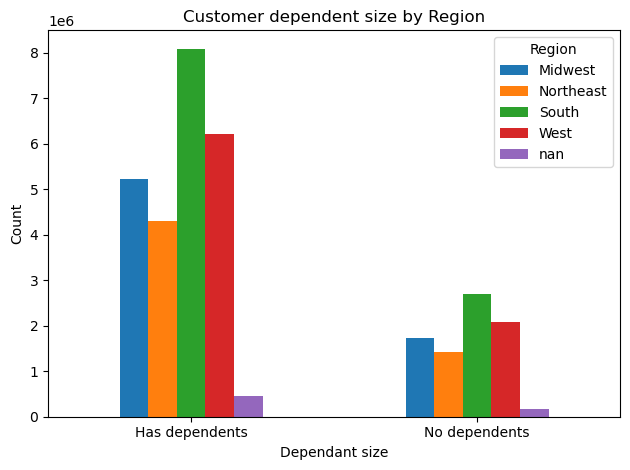

In [72]:
# Creating Bar chart for Dependents number group by Region 
plt.figure(figsize=(10, 7))
dependant_size_region_comparison_bar= dependent_region_comparison.plot(kind='bar',rot=0)
plt.title('Customer dependent size by Region')
plt.xlabel('Dependant size')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [143]:
# Importing chart

dependant_size_region_comparison_bar.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'dependant_size_region_comparison_bar_4.10.png'))

#### Comparing customer profiles with departments

In [74]:
# Importing department wrangled data

df_depts = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [75]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


#### In order to compare customer profiles with departments need to connect the data from custs_ords_prods_merged with the data of the departments dataframe through the department_id column.

In [77]:
# Creating column 'department_id' in department dataframe by renaming Unnamed: 0 column	

df_depts.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [78]:
df_depts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [79]:
# Checking data type

df_depts.dtypes

department_id     int64
department       object
dtype: object

In [80]:
# Changing data type befor merging to string

df_depts['department_id']= df_depts['department_id'].astype(str)

In [81]:
df_depts.dtypes

department_id    object
department       object
dtype: object

In [82]:
# Dropping ' _merge' column from custs_ords_prods_merged before merge dataframes
custs_ords_prods_merged =custs_ords_prods_merged.drop (columns=['_merge'])

In [84]:
custs_ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   product_id                     object 
 1   product_name                   object 
 2   aisle_id                       object 
 3   department_id                  object 
 4   prices                         float64
 5   order_id                       object 
 6   user_id                        object 
 7   order_number                   int64  
 8   order_dow                      int64  
 9   order_hour_of_day              int64  
 10  days_since_prior_order         float64
 11  add_to_cart_order              int64  
 12  reordered                      int64  
 13  busiest_day                    object 
 14  busiest_days                   object 
 15  busiest_period_of_day          object 
 16  max_order                      int64  
 17  loyalty_flag                   object 
 18  

In [85]:
custs_ords_prods_merged['prices'] = custs_ords_prods_merged ['prices'].astype(np.float32)
custs_ords_prods_merged['order_number'] = custs_ords_prods_merged ['order_number'].astype(np.int32)
custs_ords_prods_merged['order_dow'] = custs_ords_prods_merged ['order_dow'].astype(np.int32)
custs_ords_prods_merged['order_hour_of_day'] = custs_ords_prods_merged ['order_hour_of_day'].astype(np.int32)
custs_ords_prods_merged['days_since_prior_order'] = custs_ords_prods_merged ['days_since_prior_order'].astype(np.float32)
custs_ords_prods_merged['add_to_cart_order'] = custs_ords_prods_merged ['add_to_cart_order'].astype(np.int32)
custs_ords_prods_merged['reordered'] = custs_ords_prods_merged ['reordered'].astype(np.int32)
custs_ords_prods_merged['max_order'] = custs_ords_prods_merged ['max_order'].astype(np.int32)
custs_ords_prods_merged['average_price'] = custs_ords_prods_merged ['average_price'].astype(np.float32)
custs_ords_prods_merged['median_days_since_prior_order'] = custs_ords_prods_merged ['median_days_since_prior_order'].astype(np.float32)
custs_ords_prods_merged['age'] = custs_ords_prods_merged ['age'].astype(np.int32)
custs_ords_prods_merged['number_of_dependents'] = custs_ords_prods_merged ['number_of_dependents'].astype(np.int32)
custs_ords_prods_merged['income'] = custs_ords_prods_merged ['income'].astype(np.int32)

In [86]:
custs_ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   product_id                     object 
 1   product_name                   object 
 2   aisle_id                       object 
 3   department_id                  object 
 4   prices                         float32
 5   order_id                       object 
 6   user_id                        object 
 7   order_number                   int32  
 8   order_dow                      int32  
 9   order_hour_of_day              int32  
 10  days_since_prior_order         float32
 11  add_to_cart_order              int32  
 12  reordered                      int32  
 13  busiest_day                    object 
 14  busiest_days                   object 
 15  busiest_period_of_day          object 
 16  max_order                      int32  
 17  loyalty_flag                   object 
 18  

In [95]:
# Merging df_depts and 'custs_ords_prods_merged' via department_id
custs_ords_prods_depts_merged = custs_ords_prods_merged.merge(df_depts, on = 'department_id')                                                          

MemoryError: Unable to allocate 247. MiB for an array with shape (1, 32404859) and data type object

#### Since even after changing the data type, there is not enough memory for the merging dataframes, a new data frame will be created with columns from 'custs_ords_prods_merged' required for analysis.

In [97]:
custs_ords_prods_merged.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_price',
 'spending_flag',
 'median_days_since_prior_order',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_of_dependents',
 'marital_status',
 'income',
 'region',
 'exclusion_flag',
 'age_group',
 'income_group',
 'dependents_flag']

In [100]:
# Creating new smaller dataframe with necessary columns

df_1 = custs_ords_prods_merged [['department_id', 'prices','order_number', 'order_hour_of_day', 'days_since_prior_order', 
                                 'age', 'number_of_dependents', 'income', 'age_group',
                                'income_group', 'dependents_flag']]

In [113]:
# Merging df_depts and 'custs_ords_prods_merged' via department_id
df_merged = df_1.merge(df_depts,on = 'department_id', indicator = True)

In [115]:
df_merged.head()

,department_id,prices,order_number,order_hour_of_day,days_since_prior_order,age,number_of_dependents,income,age_group,income_group,dependents_flag,department,_merge
0,19,5.8,28,11,3.0,81,1,49620,Elder,Low,Has dependents,snacks,both
1,19,5.8,30,17,20.0,81,1,49620,Elder,Low,Has dependents,snacks,both
2,19,5.8,2,21,6.0,66,2,158302,Elder,High,Has dependents,snacks,both
3,19,5.8,1,13,7.0,40,3,31308,Adult,Low,Has dependents,snacks,both
4,19,5.8,3,17,9.0,40,3,31308,Adult,Low,Has dependents,snacks,both


In [117]:
# Creating crosstab to compare age_group profile with departments

age_department_comparison = pd.crosstab(df_merged['age_group'],df_merged['department'],dropna = False)

In [119]:
age_department_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Adult,44890,127238,349788,789244,208477,10271,319096,1615921,313917,256969,...,219146,80649,209439,20381,10730,556843,132443,28324,2832448,860333
Elder,39036,109445,309522,714832,183844,9242,282438,1426213,277618,228935,...,196935,70774,190114,18094,9425,496979,117405,26286,2513763,760515
Older Adult,49359,134108,366692,850960,221198,10638,333034,1681753,329214,270914,...,230912,83793,220521,21671,11469,587752,141907,29811,2955476,905758
Young adult,20411,53011,146426,333087,89514,4422,133490,674860,130500,109809,...,91673,34037,88853,8999,4667,233795,55817,13295,1177604,360944


<Figure size 2000x1700 with 0 Axes>

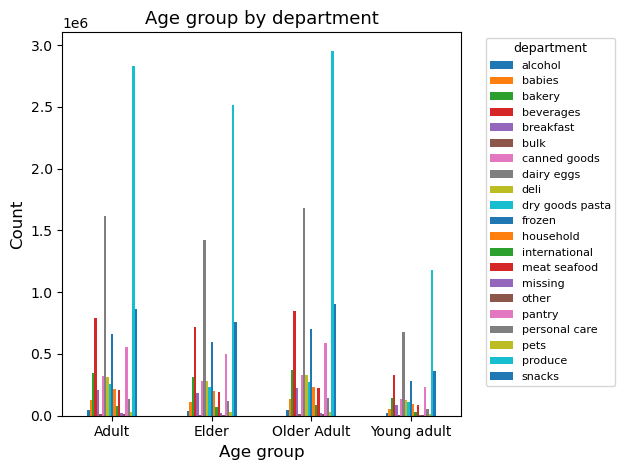

In [121]:
# Creating Bar chart for Age group by Department
plt.figure(figsize=(20, 17))
age_department_comparison_bar= age_department_comparison.plot(kind='bar',rot=0)
plt.title('Age group by department', fontsize=13)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='department', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8, title_fontsize=9)

# Increase font size for ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

In [145]:
# Importing chart

age_department_comparison_bar.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'age_department_comparison_bar_4.10.png'))

In [123]:
# Creating crosstab to compare income_group profile with departments

income_group_department_comparison = pd.crosstab(df_merged['income_group'],df_merged['department'],dropna=False)

In [125]:
income_group_department_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
High,72729,202331,549512,1173420,310630,14691,509557,2501987,482103,411995,...,335774,125774,351525,31248,16555,879995,203222,47052,4410706,1147576
Low,19808,30858,114709,405505,97368,4889,86652,535079,114096,70641,...,94179,23441,37065,7240,4183,179432,51755,9312,882102,592279
Middle,61159,190613,508207,1109198,295035,14993,471849,2361681,455050,383991,...,308713,120038,320337,30657,15553,815942,192595,41352,4186483,1147695


<Figure size 2000x1700 with 0 Axes>

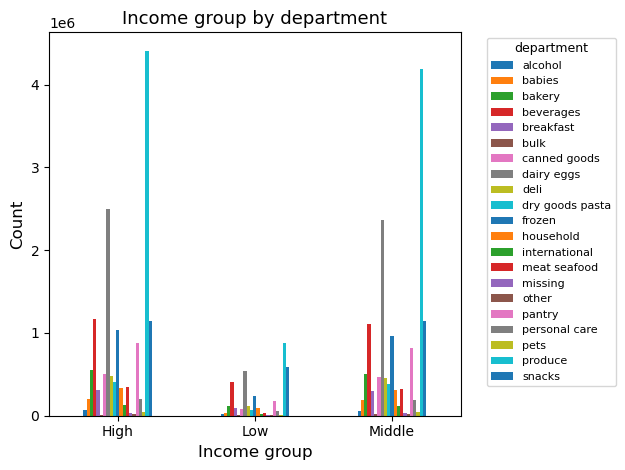

In [135]:
# Creating Bar chart for Income group by Department
plt.figure(figsize=(20, 17))
income_group_department_comparison_bar= income_group_department_comparison.plot(kind='bar',rot=0)
plt.title('Income group by department', fontsize=13)
plt.xlabel('Income group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='department', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8, title_fontsize=9)

# Increase font size for ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

In [147]:
# Importing chart

income_group_department_comparison_bar.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'income_group_department_comparison_bar_4.10.png'))

In [149]:
# Creating crosstab to compare dependent group profile with departments 

dependent_department_comparison = pd.crosstab(df_merged['dependents_flag'],df_merged['department'],dropna = False)

In [151]:
dependent_department_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dependents_flag,,,,,,,,,,,,,,,,,,,,,
Has dependents,114578,317308,878023,2013681,528456,26295,803220,4049385,786104,651365,...,557893,201540,534843,52057,27116,1408612,335566,73133,7103846,2166752
No dependents,39118,106494,294405,674442,174577,8278,264838,1349362,265145,215262,...,180773,67713,174084,17088,9175,466757,112006,24583,2375445,720798


<Figure size 2000x1700 with 0 Axes>

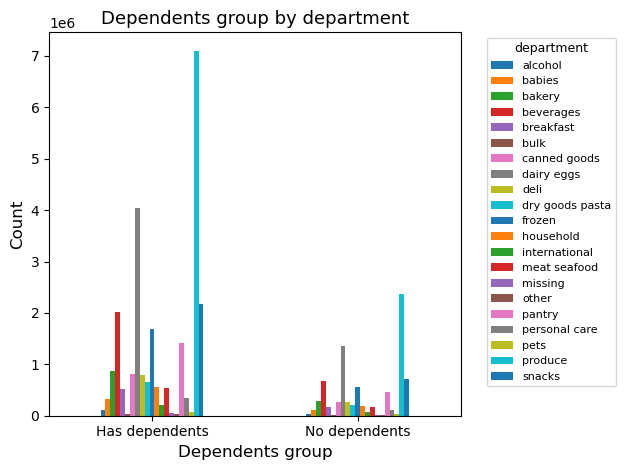

In [159]:
# Creating Bar chart for Dependents group by Department
plt.figure(figsize=(20, 17))
dependent_department_comparison_bar= dependent_department_comparison.plot(kind='bar',rot=0)
plt.title('Dependents group by department', fontsize=13)
plt.xlabel('Dependents group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='department', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8, title_fontsize=9)

# Increase font size for ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

In [161]:
# Importing chart

dependent_department_comparison_bar.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'dependents_group_department_comparison_bar_4.10.png'))

In [163]:
custs_ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   product_id                     object 
 1   product_name                   object 
 2   aisle_id                       object 
 3   department_id                  object 
 4   prices                         float32
 5   order_id                       object 
 6   user_id                        object 
 7   order_number                   int32  
 8   order_dow                      int32  
 9   order_hour_of_day              int32  
 10  days_since_prior_order         float32
 11  add_to_cart_order              int32  
 12  reordered                      int32  
 13  busiest_day                    object 
 14  busiest_days                   object 
 15  busiest_period_of_day          object 
 16  max_order                      int32  
 17  loyalty_flag                   object 
 18  

In [165]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   department_id           object 
 1   prices                  float32
 2   order_number            int32  
 3   order_hour_of_day       int32  
 4   days_since_prior_order  float32
 5   age                     int32  
 6   number_of_dependents    int32  
 7   income                  int32  
 8   age_group               object 
 9   income_group            object 
 10  dependents_flag         object 
dtypes: float32(2), int32(5), object(4)
memory usage: 1.8+ GB


In [167]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 13 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   department_id           object  
 1   prices                  float32 
 2   order_number            int32   
 3   order_hour_of_day       int32   
 4   days_since_prior_order  float32 
 5   age                     int32   
 6   number_of_dependents    int32   
 7   income                  int32   
 8   age_group               object  
 9   income_group            object  
 10  dependents_flag         object  
 11  department              object  
 12  _merge                  category
dtypes: category(1), float32(2), int32(5), object(5)
memory usage: 2.1+ GB


In [ ]:
# Exporting dataframe

custs_ords_prods_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_final.pkl'))

In [173]:
# Exporting dataframe

df_1.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_1_subset_final.pkl'))

In [175]:
# Exporting dataframe

df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'subset_merged_departments_final_4.10.pkl'))

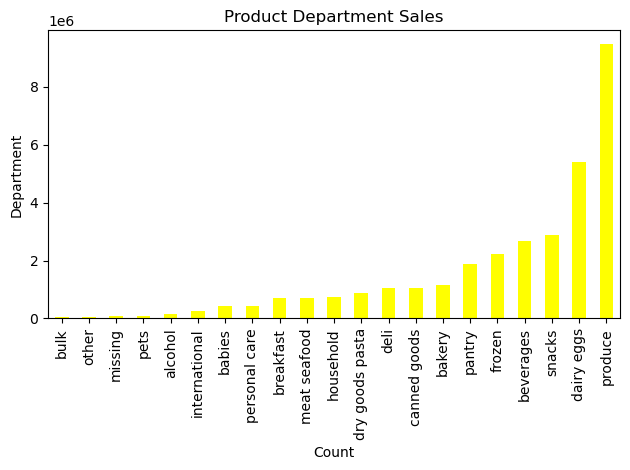

In [187]:
# Creating department bar chart
dept_bar=df_merged['department'].value_counts().sort_values().plot(kind='bar', color =['yellow'])
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [189]:
# Importing chart

dept_bar.figure.savefig(os.path.join (path, '04 Analysis','Visualizations', 'dept_bar_4.10.png'))